In [35]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

In [36]:
data = pd.read_csv('fish_data.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [38]:
data.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [39]:
y = data['species'] 
X = data[['length', 'weight', 'w_l_ratio']] 

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data pelatihan dan data uji
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Latih dan transformasi data pelatihan
X_test_scaled = scaler.transform(X_test)        # Transformasi data uji dengan scaler yang sama


In [42]:
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

Shapes of training and testing sets:
X_train: (3264, 3) X_test: (816, 3)


In [43]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
print("Descriptive statistics of the training set:")
print(X_train.describe())

Descriptive statistics of the training set:
             length        weight     w_l_ratio
count  3.264000e+03  3.264000e+03  3.264000e+03
mean  -1.393221e-16 -5.224579e-17  2.133370e-16
std    1.000153e+00  1.000153e+00  1.000153e+00
min   -1.532089e+00 -1.633093e+00 -1.409695e+00
25%   -8.438847e-01 -6.416045e-01 -6.838447e-01
50%   -1.185046e-03 -4.105781e-01 -5.225447e-01
75%    7.319636e-01  3.595102e-01  7.073676e-01
max    2.330284e+00  2.448374e+00  3.106705e+00


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [45]:
y_pred = svc.predict(X_test)

In [46]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_test = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with default hyperparameters: 0.9154
Model accuracy score with linear kernel and C=1.0: 0.9191
Training-set accuracy score: 0.9332


Confusion matrix

 [[97  0  0  0  0  0  0  0  0]
 [ 0 95  0  1  0  0  0  0  0]
 [ 0  0 64  0  0  0  0 36  0]
 [ 0  0  0 85  0  0  0  0  0]
 [ 0  0  0  0 84  0  0  0  0]
 [ 0  0  0  0  0 85  0  0  0]
 [ 0  0  0  0  0  0 74  0  0]
 [ 0  0 29  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0  0 92]]


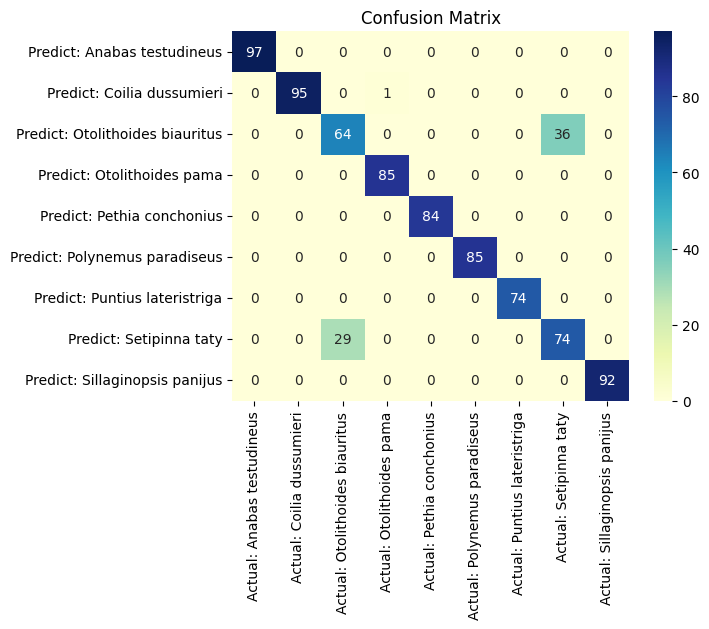

In [47]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
class_names = y.unique()  
cm_matrix = pd.DataFrame(data=cm, columns=[f'Actual: {cls}' for cls in class_names], 
                         index=[f'Predict: {cls}' for cls in class_names])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      0.99      0.99        96
Otolithoides biauritus       0.69      0.64      0.66       100
     Otolithoides pama       0.99      1.00      0.99        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       1.00      1.00      1.00        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.67      0.72      0.69       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.92       816
             macro avg       0.93      0.93      0.93       816
          weighted avg       0.92      0.92      0.92       816



C:\Users\yahya\AppData\Local\Temp\ipykernel_14544\3672447334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")


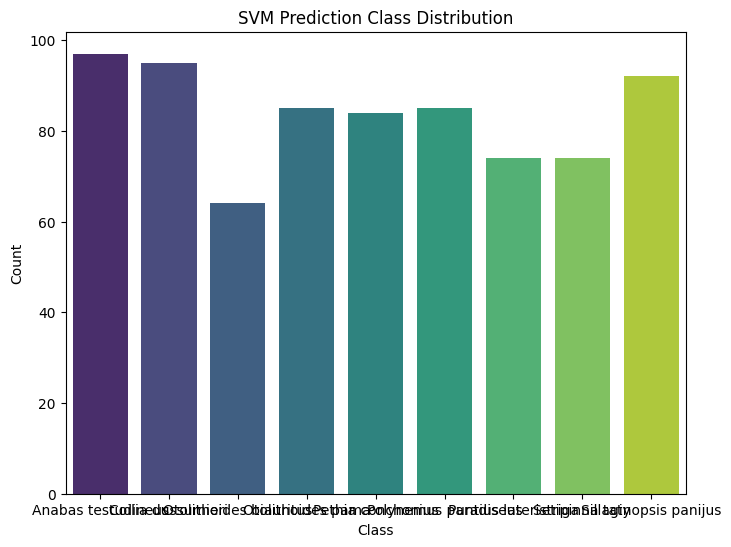

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")
plt.title("SVM Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [50]:
c_values = [0.1, 1, 10, 100,1000]
print("\nExperimenting with different C values:")
for c_value in c_values:
    svc = SVC(kernel='linear', C=c_value)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f'Model accuracy score with C={c_value}: {accuracy_score(y_test, y_pred):0.4f}')


Experimenting with different C values:
Model accuracy score with C=0.1: 0.9130
Model accuracy score with C=1: 0.9191
Model accuracy score with C=10: 0.9228
Model accuracy score with C=100: 0.9265
Model accuracy score with C=1000: 0.9265


In [51]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

import pickle
with open("svm_fish_model.pkl", "wb") as svm_file:
    pickle.dump(svm_model, svm_file)

print("SVM model has been saved successfully!")

SVM model has been saved successfully!
